<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3-决策树" data-toc-modified-id="3-决策树-5">3 决策树</a></span><ul class="toc-item"><li><span><a href="#3.1-特征选择" data-toc-modified-id="3.1-特征选择-5.1">3.1 特征选择</a></span></li><li><span><a href="#3.2-决策树生成" data-toc-modified-id="3.2-决策树生成-5.2">3.2 决策树生成</a></span></li><li><span><a href="#3.3-决策树剪枝" data-toc-modified-id="3.3-决策树剪枝-5.3">3.3 决策树剪枝</a></span></li><li><span><a href="#3.4-分类与回归树CART" data-toc-modified-id="3.4-分类与回归树CART-5.4">3.4 分类与回归树CART</a></span><ul class="toc-item"><li><span><a href="#3.4.1-回归树的生成" data-toc-modified-id="3.4.1-回归树的生成-5.4.1">3.4.1 回归树的生成</a></span></li><li><span><a href="#3.4.2-分类树的生成" data-toc-modified-id="3.4.2-分类树的生成-5.4.2">3.4.2 分类树的生成</a></span></li><li><span><a href="#3.4.3-CART树剪枝" data-toc-modified-id="3.4.3-CART树剪枝-5.4.3">3.4.3 CART树剪枝</a></span></li></ul></li><li><span><a href="#3.5-决策树的实现及应用" data-toc-modified-id="3.5-决策树的实现及应用-5.5">3.5 决策树的实现及应用</a></span><ul class="toc-item"><li><span><a href="#3.5.1-信息增益计算" data-toc-modified-id="3.5.1-信息增益计算-5.5.1">3.5.1 信息增益计算</a></span></li><li><span><a href="#3.5.2-决策树生成的ID3算法" data-toc-modified-id="3.5.2-决策树生成的ID3算法-5.5.2">3.5.2 决策树生成的ID3算法</a></span></li><li><span><a href="#3.5.3-决策树分类的sklearn调用" data-toc-modified-id="3.5.3-决策树分类的sklearn调用-5.5.3">3.5.3 决策树分类的sklearn调用</a></span></li></ul></li></ul></li></ul></div>

# 3 决策树

决策树是基于树结构来对实例进行决策的一种基本的分类和回归的机器学习方法。决策树由结点和有向边组成，结点分为内部结点（表示一个特征的划分）和叶子结点（表示一个类别或输出）。

决策树学习，训练数据集
\begin{align*} \\& D = \left\{ \left( \mathbf{x}_{1}, y_{1} \right), \left( \mathbf{x}_{2}, y_{2} \right), \cdots, \left(\mathbf{x}_i,y_i\right),\cdots,\left( \mathbf{x}_{N}, y_{N} \right) \right\} \end{align*}   
其中，$\mathbf{x}_{i}$为第$i$个特征向量（实例），$\mathbf{x}_{i}=\left( x^{\left(1\right)}_i,x^{\left(2\right)}_i,\ldots ,x^{\left(j\right)}_i,\ldots ,x^{\left(n\right)}_i\right) ^{T} \in \mathcal{X} \subseteq \mathbb{R}^{n}$；$y_{i}$为$\mathbf{x}_{i}$的类别标记，$y_i\in\{1,2,\cdots,K\}$。学习的目标数是根据给定的训练数据集构建一个决策树模型，使得可对实例进行正确的分类或回归。

决策树学习包括3个步骤：特征选择、决策树生成、决策树修剪。

## 3.1 特征选择

 特征选择在于选取对于训练数据具有分类能力的特征。

熵表示随机变量不确定性的度量。  (信息论也很重要，里面很重要的工具、结论、原理，为机器学习模型构建指明了方向，提供了很好的数学工具)

设$X$是一个取有限个值的离散随机变量，其概率分布为
\begin{align*} P \left( X = x_{i} \right) = p_{i}, \quad i =1, 2, \cdots, n \end{align*}  
则随机变量$X$的熵
\begin{align*} H \left( X \right) = H \left( p \right) = - \sum_{i=1}^{n} p_{i} \log p_{i} \end{align*}   
其中，若$p_{i}=0$，则定义$0 \log 0 = 0$

若
\begin{align*} p_{i} = \dfrac{1}{n} \end{align*}   
则
\begin{align*} \\ & H \left( p \right) = - \sum_{i=1}^{n} p_{i} \log p_{i} 
\\ & = - \sum_{i=1}^{n} \dfrac{1}{n} \log \dfrac{1}{n}
\\ & = \log n\end{align*} 
由定义，得
\begin{align*} \\ & 0 \leq H \left( p \right) \leq \log n\end{align*} 

设有随机变量$\left( X , Y \right)$，其联合分布
\begin{align*} \\ & P \left( X = x_{i}, Y = y_{j} \right) = p_{ij}, \quad i=1,2, \cdots, n; \quad j=1,2, \cdots, m\end{align*} 

随机变量$X$给定的条件下随机变量$Y$的条件熵
\begin{align*} \\ & H \left( Y | X \right) = \sum_{i=1}^{n} p_{i} H \left( Y | X = x_{i} \right) \end{align*}  
即，$X$给定条件下$Y$的条件概率分布的熵对$X$的数学期望。其中，$p_{i}=P \left( X = x_{i} \right), i= 1,2,\cdots,n$。  
条件熵$H \left( Y | X \right)$表示在已知随机变量$X$的条件下随机变量$Y$的不确定性。

（$ H ( Y | X)  < & H( Y ) $）

特征$A$对训练集$D$的信息增益
\begin{align*} \\ & g \left( D, A \right) = H \left( D \right) - H \left( D | A \right) \end{align*}   
即，集合$D$的经验熵$H \left( D \right)$与特征$A$给定条件下$D$的经验条件熵$H \left( D | A \right)$之差。  
其中，当熵和条件熵由数据估计（极大似然估计）得到时，对应的熵和条件熵分别称为经验熵和经验条件熵。  

设训练数据集为$D$，$\left| D \right|$表示其样本容量，即样本个数。  
设有$K$个类$C_{k}, k=1,2,\cdots,K$，$\left| C_{k} \right|$为属于类$C_{k}$的样本的个数，$\sum_{k=1}^{K} \left| C_{k} \right| = \left| D \right|$。  
设特征$A$有$n$个不同的特征取值$\left\{ a_{1},a_{2},\cdots,a_{n}\right\}$，根据特征$A$的取值将$D$划分为$n$个子集$D_{1},D_{2},\cdots,D_{n}$，$\left| D_{i} \right|$为$D_{i}$的样本数，$\sum_{i=1}^{n}\left| D_{i} \right| = \left| D \right|$。  
记子集$D_{i}$中属于类$C_{k}$的样本的集合为$D_{ik}$，即$D_{ik} = D_{i} \cap C_{k}$，$\left| D_{ik} \right|$为$D_{ik}$的样本个数。

信息增益算法：  
输入：训练数据集$D$和特征$A$  
输出：特征$A$对训练数据集$D$的信息增益$g \left( D, A \right) $
1. 计算数据集$D$的经验熵$H\left(D\right)$  
\begin{align*} \\ &  H \left( D \right) = -\sum_{k=1}^{K} \dfrac{\left|C_{k}\right|}{\left| D \right|}\log_{2}\dfrac{\left|C_{k}\right|}{\left| D \right|} \end{align*}
2. 计算特征$A$对数据集$D$的经验条件熵$H \left( D | A \right)$
\begin{align*} \\ & H \left( D | A \right) = \sum_{i=1}^{n} \dfrac{\left| D_{i} \right|}{\left| D \right|} H \left( D_{i} \right)
\\ & = -\sum_{i=1}^{n} \dfrac{\left| D_{i} \right|}{\left| D \right|} \sum_{k=1}^{K} \dfrac{\left| D_{ik} \right|}{\left| D_{i} \right|} \log_{2} \dfrac{\left| D_{ik} \right|}{\left| D_{i} \right|}\end{align*}
3. 计算信息增益
\begin{align*} \\ & g \left( D, A \right) = H \left( D \right) - H \left( D | A \right) \end{align*}

特征$A$对训练集$D$的信息增益比
\begin{align*} \\ & g_{R} \left( D, A \right) = \dfrac{g \left( D, A \right)}{H_{A} \left(D\right)}\end{align*}   
即，信息增益$g\left( D, A \right)$与训练数据集$D$关于特征$A$的经验熵$H_{A}\left(D\right)$之比。  
其中，
\begin{align*} \\ & H_{A} \left( D \right) = -\sum_{i=1}^{n} \dfrac{\left|D_{i}\right|}{\left|D\right|}\log_{2}\dfrac{\left|D_{i}\right|}{\left|D\right|}\end{align*}  

以信息增益为特征选择标准偏向取值较多的特征。当特征的取值较多时，根据此特征划分更容易得到纯度更高的子集，因此划分之后的熵更低。由于划分前的熵是一定的，因此信息增益更大。

以信息增益比为特征选择标准偏向取值较少的特征。当特征取值较少时$H_A\left(D\right)$的值较小，因此其倒数较大，因而信息增益比较大。

## 3.2 决策树生成

ID3算法：  
输入：训练数据集$D$，特征集合$A$，阈值$\varepsilon$  
输出：决策树$T$
1. 若$D$中所有实例属于同一类$C_{k}$，则$T$为单结点树，并将类$C_{k}$作为该结点的类标记，返回$T$； 
2. 若$A = \emptyset$（空集），则$T$为单结点树，并将$D$中实例数最大的类$C_{k}$作为该结点的类标记，返回$T$；
3. 否则，计算$A$中各特征对$D$的信息增益，选择信息增益最大的特征$A_{g}$
\begin{align*} \\ & A_{g} = \mathop{\arg \max}_{A_i\in A} g \left( D, A_i \right) \end{align*}  
4. 如果$A_{g}$的信息增益小于阈值$\varepsilon$，则置$T$为单结点树，并将$D$中实例数量最大的类$C_{k}$作为该结点的类标记，返回$T$;
5. 否则，对$A_{g}$的每一个可能值$a_{i}$，依$A_{g}=a_{i}$将$D$分割为若干非空子集$D_{i}$，将$D_{i}$中实例数对大的类作为标记，构建子结点，由结点及其子结点构成树$T$，返回$T$；
6. 对第$i$个子结点，以$D_{i}$为训练集，以$A-\left\{A_{g}\right\}$为特征集，递归地调用步1.～步5.，得到子树$T_{i}$，返回$T_{i}$。

C4.5算法：  
输入：训练数据集$D$，特征集合$A$，阈值$\varepsilon$  
输出：决策树$T$
1. 若$D$中所有实例属于同一类$C_{k}$，则$T$为单结点树，并将类$C_{k}$作为该结点的类标记，返回$T$； 
2. 若$A = \emptyset$，则$T$为单结点树，并将$D$中实例数最大的类$C_{k}$作为该结点的类标记，返回$T$；
3. 否则，计算$A$中各特征对$D$的信息增益，选择信息增益比最大的特征$A_{g}$
\begin{align*} \\ & A_{g} = \mathop{\arg \max}_{A_i\in A} g_{R} \left( D, A_i \right) \end{align*}  
4. 如果$A_{g}$的信息增益小于阈值$\varepsilon$，则置$T$为单结点树，并将$D$中实例数量最大的类$C_{k}$作为该结点的类标记，返回$T$;
5. 否则，对$A_{g}$的每一个可能值$a_{i}$，依$A_{g}=a_{i}$将$D$分割为若干非空子集$D_{i}$，将$D_{i}$中实例数对大的类作为标记，构建子结点，由结点及其子结点构成树$T$，返回$T$；
6. 对第$i$个子结点，以$D_{i}$为训练集，以$A-\left\{A_{g}\right\}$为特征集，递归地调用步1.～步5.，得到子树$T_{i}$，返回$T_{i}$。

## 3.3 决策树剪枝

决策树的剪枝通过极小化决策树整体的损失函数或代价函数来实现。  
设树$T$的叶结点个数为$\left| T \right|$，$t$是树$T$的叶结点，该叶结点有$N_{t}$个样本点，其中$k$类的样本点有$N_{tk}$个，$k=1,2,\cdots,K$，$H_{t}\left(T\right)$为叶结点$t$上的经验熵，  
则决策树的损失函数
\begin{align*} \\ & C_{\alpha} \left( T \right) = \sum_{t=1}^{\left| T \right|} N_{t} H_{t} \left( T \right) + \alpha \left| T \right| \end{align*}   
其中，$\alpha \geq 0$为参数，经验熵
\begin{align*} \\ & H_{t} \left( T \right) = - \sum_{k} \dfrac{N_{tk}}{N_{t}} \log \dfrac{N_{tk}}{N_{t}} \end{align*} 

损失函数中，记
\begin{align*} \\ & C \left( T \right) = \sum_{t=1}^{\left| T \right|} N_{t} H_{t} \left( T \right) = - \sum_{t=1}^{\left| T \right|} \sum_{k=1}^{K} N_{tk} \log \dfrac{N_{tk}}{N_{t}}   \end{align*}   
则
\begin{align*} \\ & C_{\alpha} \left( T \right) = C \left( T \right) + \alpha \left| T \right|   \end{align*}  
其中，$C \left( T \right)$表示模型对训练数据的预测误差，即模型与训练数据的拟合程度，$\left| T \right|$表示模型复杂度，参数$\alpha \geq 0$控制两者之间的影响。

树的剪枝算法：  
输入：决策树$T$，参数$\alpha$   
输出：修剪后的子树$T_{\alpha}$
1. 计算每个结点的经验熵 
2. 递归地从树的叶结点向上回缩  
设一组叶结点回缩到其父结点之前与之后的整体树分别为$T_{B}$与$T_{A}$，其对应的损失函数值分别是$C_{\alpha} \left( T_{B} \right)$与$C_{\alpha} \left( T_{A} \right)$，如果
\begin{align*} \\ & C_{\alpha} \left( T_{A} \right) \leq C_{\alpha} \left( T_{B} \right)  \end{align*}
则进行剪枝，即将父结点变为新的叶结点。
3. 返回2.，直到不能继续为止，得到损失函数最小的子树$T_{\alpha}$

## 3.4 分类与回归树CART

### 3.4.1 回归树的生成

一个回归树对应着输入空间的一个划分以及在划分单元上的输出值。假设已将输入空间划分为$M$个单元$R_1,R_2,\cdots,R_M$，并且在每个单元$R_m$上有一个固定的输出值$c_m$，于是回归树模型可表示为
$$f\left(\mathbf{x}\right)=\sum_{m=1}^M c_m I\left(\mathbf{x}\in R_m\right)$$

决策树本质上就是对输入空间的离散化，并对每个子空间进行类别确认。$f(\mathbf{x})$ 是一棵树， $I$ 是个指示（条件）函数，当$(\mathbf{x}\in R_m)$条件成立时返回1，否则返回0。

假设$X$与$Y$分别为输入和输出变量，并且$Y$是连续变量，给定训练数据集
\begin{align*} \\ & D = \left\{  \left(\mathbf{x}_{1},y_{1}\right), \left(\mathbf{x}_{2},y_{2}\right),\cdots,\left(\mathbf{x}_{N},y_{N}\right) \right\}   \end{align*}    
可选择第$j$个变量$x^{\left(j\right)}$及其取值$s$作为切分变量和切分点，并定义两个区域
\begin{align*} \\ & R_{1} \left( j,s \right) = \left\{ x | x^{\left(j\right)} \leq s \right\}, \quad R_{2} \left( j,s \right) = \left\{ x | x^{\left(j\right)} > s \right\}   \end{align*}
最优切分变量$x_{j}$及最优切分点$s$
\begin{align*} \\ & j,s = \mathop{\arg \min}_{j,s} \left[ \min_{c_{1}} \sum_{x_{i} \in R_{1} \left(j,s\right)} \left( y_{i} - c_{1} \right)^{2} + \min_{c_{2}} \sum_{x_{i} \in R_{2} \left(j,s\right)} \left( y_{i} - c_{2} \right)^{2}\right]   \end{align*}  
其中，$c_{m}$是区域$R_{m}$上的回归决策树输出，是区域$R_{m}$上所有输入实例$x_{i}$对应的输出$y_{i}$的均值
\begin{align*} \\ & c_{m} = ave \left( y_{i} | x_{i} \in R_{m} \right), \quad m=1,2   \end{align*}  
对每个区域$R_{1}$和$R_{2}$重复上述过程，将输入空间划分为$M$个区域$R_{1},R_{2},\cdots,R_{M}$，在每个区域上的输出为$c_{m},m=1,2,\cdots,M$，最小二乘回归树
\begin{align*} \\ & f \left( x \right) = \sum_{m=1}^{M} c_{m} I \left( x \in R_{m} \right)   \end{align*}  

最小二乘回归树生成算法：  
输入：训练数据集$D$   
输出：回归树$f \left( x \right)$
1. 选择最优切分变量$x^{\left(j\right)}$与切分点$s$
\begin{align*} \\ & j,s = \arg \min_{j,s} \left[ \min_{c_{1}} \sum_{x_{i} \in R_{1} \left(j,s\right)} \left( y_{i} - c_{1} \right)^{2} + \min_{c_{2}} \sum_{x_{i} \in R_{2} \left(j,s\right)} \left( y_{i} - c_{2} \right)^{2}\right]   \end{align*}  
2. 用最优切分变量$x^{\left(j\right)}$与切分点$s$划分区域并决定相应的输出值 
\begin{align*} \\ & R_{1} \left( j,s \right) = \left\{ x | x^{\left(j\right)} \leq s \right\}, \quad R_{2} \left( j,s \right) = \left\{ x | x^{\left(j\right)} > s \right\}   
\\ & c_{m} = \dfrac{1}{N} \sum_{x_{i} \in R_{m} \left( j,s \right)} y_{i}, \quad m=1,2\end{align*}
3. 继续对两个子区域调用步骤1.和2.，直到满足停止条件
4. 将输入空间划分为$M$个区域$R_{1},R_{2},\cdots,R_{M}$，生成决策树
\begin{align*} \\ & f \left( x \right) = \sum_{m=1}^{M} c_{m} I \left( x \in R_{m} \right)   \end{align*} 

### 3.4.2 分类树的生成

分类问题中，假设有$K$个类，样本点属于第$k$类的概率为$p_{k}$，则概率分布的基尼指数
\begin{align*} \\ & Gini \left( p \right) = \sum_{k=1}^{K} p_{k} \left( 1 - p_{k} \right) = 1 - \sum_{k=1}^{K}p_k^2  \end{align*} 

对于二分类问题，若样本点属于第1类的概率为$p$，则概率分布的基尼指数
\begin{align*} \\ & Gini \left( p \right) = \sum_{k=1}^{2} p_{k} \left( 1 - p_{k} \right) = 2p\left(1-p\right) \end{align*} 

对于给定样本集和$D$，其基尼指数
\begin{align*} \\ & Gini \left( D \right) = 1 - \sum_{k=1}^{K} \left( \dfrac{\left| C_{k} \right|}{\left| D \right|} \right)^{2}\end{align*}   
其中，$C_{k}$是$D$中属于第$k$类的样本自己，$K$是类别个数。

如果样本集合$D$根据特征$A$是否取某一可能值$a$被分割成$D_{1}$和$D_{2}$两个部分，即
\begin{align*} \\ & D_{1} = \left\{ \left(x,y\right) | A\left(x\right)=a \right\}, \quad D_{2} = D - D_{1} \end{align*} 
则在特征$A$的条件下，集合$D$的基尼指数
\begin{align*} \\ & Gini \left( D, A \right) = \dfrac{\left| D_{1} \right|}{\left| D \right|} Gini \left( D_{1} \right) + \dfrac{\left| D_{2} \right|}{\left| D \right|} Gini \left( D_{2} \right)\end{align*} 

基尼指数$Gini \left( D \right)$表示集合$D$的不确定性，基尼指数$Gini \left( D,A \right)$表示经$A=a$分割后集合$D$的不确定性。基尼指数值越大，样本集合的不确定性也越大。

CART生成算法：  
输入：训练数据集$D$，特征$A$，阈值$\varepsilon$  
输出：CART决策树$T$
1. 设结点的训练数据集为$D$，对每一个特征$A$，对其可能取的每个值$a$，根据样本点对$A=a$的测试为“是”或“否”将$D$分割成$D_{1}$和$D_{2}$两部分，并计算$Gini\left(D,A\right)$
2. 在所有可能的特征$A$以及其所有可能的切分点$a$中，选择基尼指数最小的特征及其对应的切分点作为最优特征与最优切分点。依此从现结点生成两个子结点，将训练数据集依特征分配到两个子结点中去。
3. 对两个子结点递归地调用1.和2.，直至满足停止条件
4. 生成CART决策树$T$

### 3.4.3 CART树剪枝

对整体树$T_{0}$任意内部结点$t$，以$t$为单结点树的损失函数
\begin{align*} \\ & C_{\alpha} \left( t \right) = C \left( t \right) + \alpha \end{align*} 
以$t$为根结点的子树$T_{t}$的损失函数
\begin{align*} \\ & C_{\alpha} \left( T_{t} \right) = C \left( T_{t} \right) + \alpha \left| T_{t} \right| \end{align*} 
当$\alpha = 0$及$\alpha$充分小时，有不等式
\begin{align*} \\ & C_{\alpha} \left( T_{t} \right) <  C_{\alpha} \left( t \right) \end{align*} 
当$\alpha$增大时，在某一$\alpha$有
\begin{align*} \\ & \quad\quad C_{\alpha} \left( T_{t} \right)  ＝  C_{\alpha} \left( t \right) 
\\ & C \left( T_{t} \right) + \alpha \left| T_{t} \right| ＝ C \left( t \right) + \alpha
\\ & \quad\quad \alpha = \dfrac{C\left( t \right) - C \left(T_{t}\right)} { \left| T_{t} \right| -1 }\end{align*} 
即$T_{t}$与$t$有相同的损失函数值，而$t$的结点少，因此对$T_{t}$进行剪枝。

CART剪枝算法：  
输入：CART决策树$T_{0}$   
输出：最优决策树$T_{\alpha}$
1. 设$k=0, T=T_{0}$
2. 设$\alpha=+\infty$
3. 自下而上地对各内部结点$t$计算$ C\left(T_{t}\right),\left| T_{t} \right|$，以及
\begin{align*} \\ & g\left(t\right) =  \dfrac{C\left( t \right) - C \left(T_{t}\right)} { \left| T_{t} \right| -1 }
\\ & \alpha = \min \left( \alpha, g\left( t \right) \right) \end{align*} 
其中，$T_{t}$表示以$t$为根结点的子树，$ C\left(T_{t}\right)$是对训练数据的预测误差，$\left| T_{t} \right|$是$T_{t}$的叶结点个数。
4. 自下而上地访问内部结点$t$，如果有$g\left(t\right)=\alpha$，则进行剪枝，并对叶结点$t$以多数表决法决定其类别，得到树$T$
5. 设$k=k+1, \alpha_{k}=\alpha, T_{k}=T$
6. 如果$T$不是由根结点单独构成的树，则回到步骤4.
7. 采用交叉验证法在子树序列$T_{0},T_{1},\cdots,T_{n}$中选取最优子树$T_{\alpha}$

## 3.5 决策树的实现及应用

### 3.5.1 信息增益计算

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pprint

In [5]:
def create_data():
    datasets = [['青年', '否', '否', '一般', '否'],
                ['青年', '否', '否', '好', '否'],
                ['青年', '是', '否', '好', '是'],
                ['青年', '是', '是', '一般', '是'],
                ['青年', '否', '否', '一般', '否'],
                ['中年', '否', '否', '一般', '否'],
                ['中年', '否', '否', '好', '否'],
                ['中年', '是', '是', '好', '是'],
                ['中年', '否', '是', '非常好', '是'],
                ['中年', '否', '是', '非常好', '是'],
                ['老年', '否', '是', '非常好', '是'],
                ['老年', '否', '是', '好', '是'],
                ['老年', '是', '否', '好', '是'],
                ['老年', '是', '否', '非常好', '是'],
                ['老年', '否', '否', '一般', '否'],]
    labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']
    
    return datasets, labels

In [6]:
datasets, labels = create_data()
train_data = pd.DataFrame(datasets, columns=labels)
train_data

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [17]:
def calc_ent(datasets):
    data_length = len(datasets)
    label_count = {}
    for i in range(data_length):
        label = datasets[i][-1]
        if label not in label_count:
            label_count[label] = 0
        label_count[label] += 1
    ent = -sum([(p / data_length) * math.log(p / data_length, 2) 
                for p in label_count.values()])
    return ent

In [18]:
def cond_ent(datasets, axis=0):
    data_length = len(datasets)
    feature_sets = {}
    for i in range(data_length):
        feature = datasets[i][axis]
        if feature not in feature_sets:
            feature_sets[feature] = []
        feature_sets[feature].append(datasets[i])
    cond_ent = sum([(len(p) / data_length) * calc_ent(p)
                    for p in feature_sets.values()])
    return cond_ent

In [19]:
def info_gain(ent, cond_ent):
    return ent - cond_ent

In [22]:
def info_gain_train(datasets):
    count = len(datasets[0]) - 1
    ent = calc_ent(datasets)
    best_feature = []
    for c in range(count):
        c_info_gain = info_gain(ent, cond_ent(datasets, axis=c))
        best_feature.append((c, c_info_gain))
        print('特征({}) - info_gain - {:.3f}'.format(labels[c], c_info_gain))
        
    best_ = max(best_feature, key=lambda x: x[-1])
    return '特征({})的信息增益最大，选择为根节点特征'.format(labels[best_[0]])

In [23]:
info_gain_train(datasets)

特征(年龄) - info_gain - 0.083
特征(有工作) - info_gain - 0.324
特征(有自己的房子) - info_gain - 0.420
特征(信贷情况) - info_gain - 0.363


'特征(有自己的房子)的信息增益最大，选择为根节点特征'

### 3.5.2 决策树生成的ID3算法

In [38]:
class Node:
    
    def __init__(self, root=True, label=None, feature_name=None, feature=None):
        self.root = root
        self.label = label
        self.feature_name = feature_name
        self.feature = feature
        self.tree = {}
        self.result = {'label:': self.label, 'feature:': self.feature, 'tree:': self.tree}
        
    def __repr__(self):
        return '{}'.format(self.result)
    
    def add_node(self, val, node):
        self.tree[val] = node
    
    def predict(self, features):
        if self.root is True:
            return self.label
        return self.tree[features[self.feature]].predict(features)

In [42]:
class DTree:
    
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon
        self._tree = {}
        
    @staticmethod
    def calc_ent(datasets):
        data_length = len(datasets)
        label_count = {}
        for i in range(data_length):
            label = datasets[i][-1]
            if label not in label_count:
                label_count[label] = 0
            label_count[label] += 1
        ent = -sum([(p / data_length) * math.log(p / data_length, 2) 
                for p in label_count.values()])
        return ent

    def cond_ent(self, datasets, axis=0):
        data_length = len(datasets)
        feature_sets = {}
        for i in range(data_length):
            feature = datasets[i][axis]
            if feature not in feature_sets:
                feature_sets[feature] = []
            feature_sets[feature].append(datasets[i])
        cond_ent = sum([(len(p) / data_length) * self.calc_ent(p)
                    for p in feature_sets.values()])
        return cond_ent
    
    @staticmethod
    def info_gain(ent, cond_ent):
        return ent - cond_ent
    
    def info_gain_train(self, datasets):
        count = len(datasets[0]) - 1
        ent = self.calc_ent(datasets)
        best_feature = []
        for c in range(count):
            c_info_gain = self.info_gain(ent, self.cond_ent(datasets, axis=c))
            best_feature.append((c, c_info_gain))
        
        best_ = max(best_feature, key=lambda x: x[-1])
        return best_
    
    def train(self, train_data):
        _, y_train, features = train_data.iloc[:, :-1], train_data.iloc[:, -1], train_data.columns[:-1]
        
        if len(y_train.value_counts()) == 1:
            return Node(root=True, label=y_train.iloc[0])
        
        if len(features) == 0:
            return Node(root=True,
                        label=y_train.value_counts().sort_values(ascending=False).index[0])
        max_feature, max_info_gain = self.info_gain_train(np.array(train_data))
        max_feature_name = features[max_feature]
        
        if max_info_gain < self.epsilon:
            return Node(root=True,
                        label=y_train.value_counts().sort_values(ascending=False).index[0])
        node_tree = Node(root=False, feature_name=max_feature_name, feature=max_feature)
        
        feature_list = train_data[max_feature_name].value_counts().index
        for f in feature_list:
            sub_train_df = train_data.loc[train_data[max_feature_name] == f].drop([max_feature_name], axis=1)
            sub_tree = self.train(sub_train_df)
            node_tree.add_node(f, sub_tree)
        
        #pprint.pprint(node_tree.tree)
        return node_tree
    
    def fit(self, train_data):
        self._tree = self.train(train_data)
        return self._tree
    
    def predict(self, X_test):
        return self._tree.predict(X_test)

In [43]:
datasets, labels = create_data()
data_df = pd.DataFrame(datasets, columns=labels)
dt = DTree()
tree = dt.fit(data_df)

In [44]:
tree

{'label:': None, 'feature:': 2, 'tree:': {'否': {'label:': None, 'feature:': 1, 'tree:': {'否': {'label:': '否', 'feature:': None, 'tree:': {}}, '是': {'label:': '是', 'feature:': None, 'tree:': {}}}}, '是': {'label:': '是', 'feature:': None, 'tree:': {}}}}

In [45]:
dt.predict(['老年', '否', '否', '一般'])

'否'

### 3.5.3 决策树分类的sklearn调用

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [5]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    return data[:, :2], data[:, -1]

In [6]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
clf.score(X_test, y_test)

0.9666666666666667

In [9]:
tree_pic = export_graphviz(clf, out_file='mytree.pdf')
with open('mytree.pdf') as f:
    dot_graph = f.read()

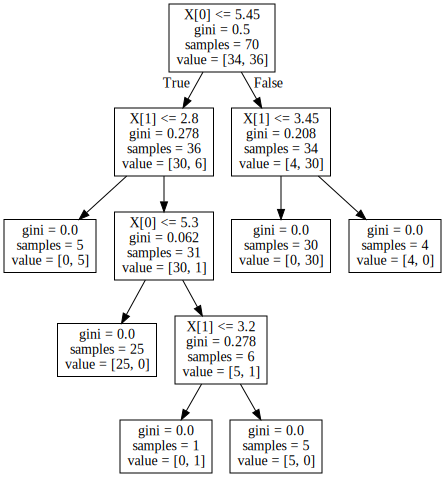

In [10]:
graphviz.Source(dot_graph)